In [3]:
! pip install -U scikit-fuzzy
!pip install networkx

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import random


In [5]:
x_air_temp = np.arange(-15, 32, 1)
x_wind_speed = np.arange(0, 9, 1)
x_build_size = np.arange(0, 36000, 1)
x_heat_loss = np.arange(0, 1.1, 0.1)



In [6]:
air_temp_lo = fuzz.trimf(x_air_temp, [-15, -15, 8])
air_temp_md = fuzz.trimf(x_air_temp, [-15, 8, 31])
air_temp_hi = fuzz.trimf(x_air_temp, [8, 31, 31])

wind_speed_lo = fuzz.trimf(x_wind_speed, [0, 0, 4])
wind_speed_md = fuzz.trimf(x_wind_speed, [0, 4, 8])
wind_speed_hi = fuzz.trimf(x_wind_speed, [4, 8, 8])

build_size_lo = fuzz.trimf(x_build_size, [0, 0, 1000])
build_size_md = fuzz.trimf(x_build_size, [0, 2000, 4000])
build_size_hi = fuzz.trimf(x_build_size, [2000, 36000, 36000])

heat_loss_lo = fuzz.trimf(x_heat_loss, [0, 0, 0.5])
heat_loss_md = fuzz.trimf(x_heat_loss, [0, 0.5, 1])
heat_loss_hi = fuzz.trimf(x_heat_loss, [0.5, 1, 1])


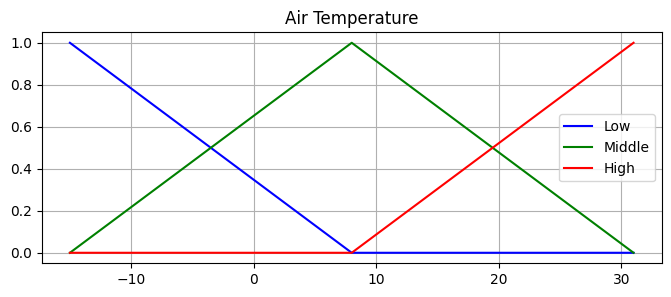

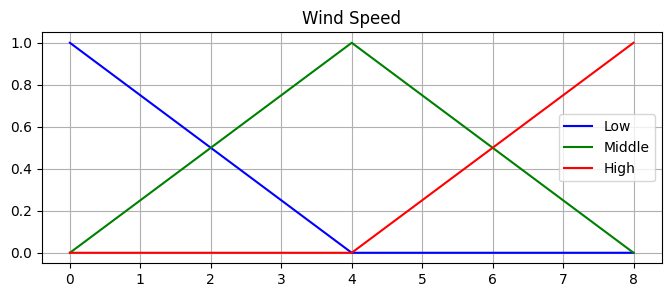

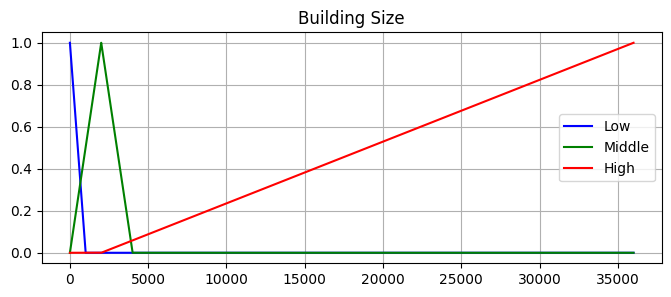

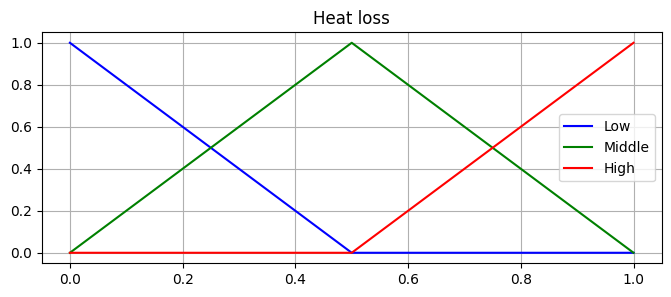

In [7]:
# Первый график: Температура воздуха
plt.figure(figsize=(8, 3))
plt.plot(x_air_temp, air_temp_lo, 'b', linewidth=1.5, label='Low')
plt.plot(x_air_temp, air_temp_md, 'g', linewidth=1.5, label='Middle')
plt.plot(x_air_temp, air_temp_hi, 'r', linewidth=1.5, label='High')
plt.title('Air Temperature')
plt.legend()
plt.grid()
plt.show()

# Второй график: Скорость ветра
plt.figure(figsize=(8, 3))
plt.plot(x_wind_speed, wind_speed_lo, 'b', linewidth=1.5, label='Low')
plt.plot(x_wind_speed, wind_speed_md, 'g', linewidth=1.5, label='Middle')
plt.plot(x_wind_speed, wind_speed_hi, 'r', linewidth=1.5, label='High')
plt.title('Wind Speed')
plt.legend()
plt.grid()
plt.show()

# Третий график: Размер здания
plt.figure(figsize=(8, 3))
plt.plot(x_build_size, build_size_lo, 'b', linewidth=1.5, label='Low')
plt.plot(x_build_size, build_size_md, 'g', linewidth=1.5, label='Middle')
plt.plot(x_build_size, build_size_hi, 'r', linewidth=1.5, label='High')
plt.title('Building Size')
plt.legend()
plt.grid()
plt.show()
# Четвертый график: Потеря тепла
plt.figure(figsize=(8, 3))
plt.plot(x_heat_loss, heat_loss_lo, 'b', linewidth=1.5, label='Low')
plt.plot(x_heat_loss, heat_loss_md, 'g', linewidth=1.5, label='Middle')
plt.plot(x_heat_loss, heat_loss_hi, 'r', linewidth=1.5, label='High')
plt.title('Heat loss')
plt.legend()
plt.grid()
plt.show()

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



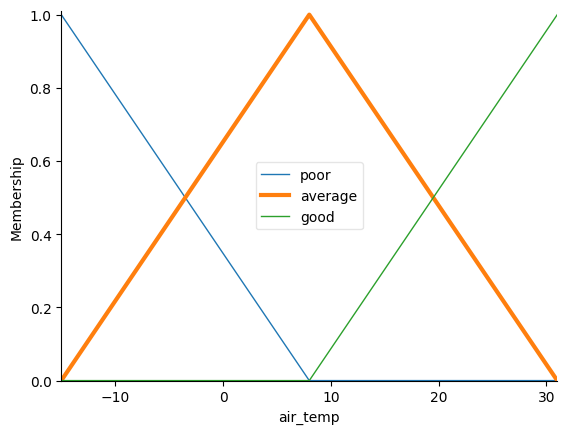

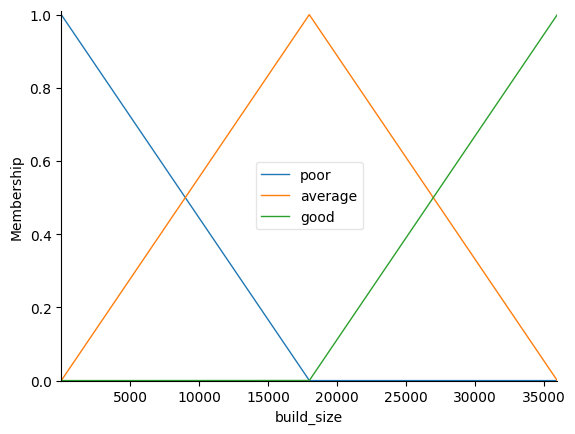

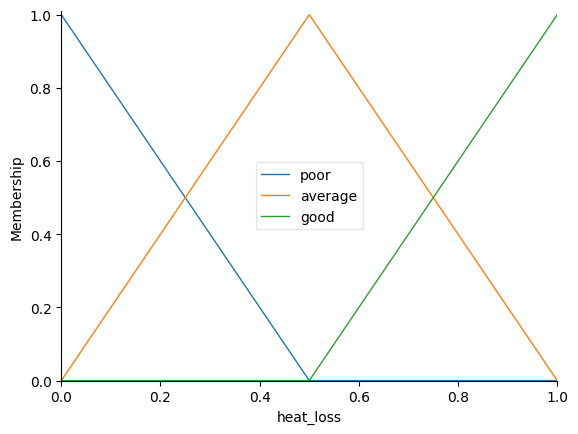

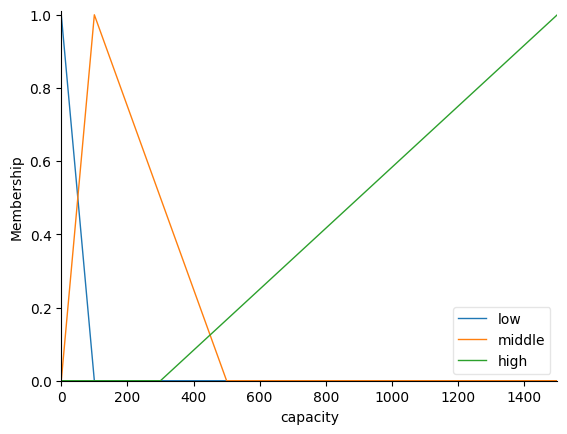

In [23]:
air_temp = ctrl.Antecedent(np.arange(-15, 32, 1), 'air_temp')
build_size = ctrl.Antecedent(np.arange(1, 36000, 1), 'build_size')
heat_loss = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'heat_loss')
capacity = ctrl.Consequent(np.arange(0, 1501, 1), 'capacity')

air_temp.automf(3)
build_size.automf(3)
heat_loss.automf(3)

capacity['low'] = fuzz.trimf(capacity.universe, [0, 0, 100])
capacity['middle'] = fuzz.trimf(capacity.universe, [0, 100, 500])
capacity['high'] = fuzz.trimf(capacity.universe, [300, 1500, 1500])

air_temp['average'].view()
build_size.view()
heat_loss.view()
capacity.view()


### Задание правил

Выходное значение мощности отопления: 779.3944963057205 кВт


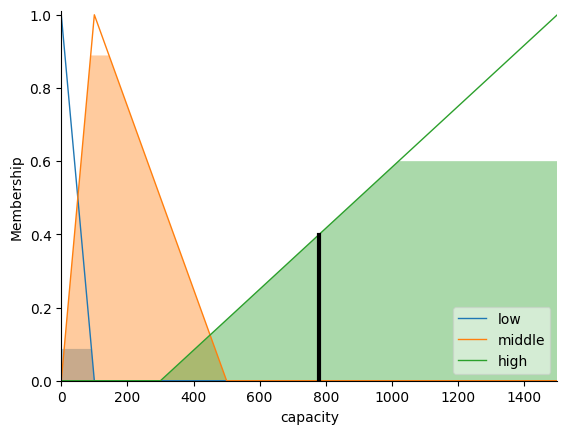

In [21]:
# Высокая мощность
rule_high = ctrl.Rule(
    (air_temp['poor'] & heat_loss['good']) |  # Холодная температура и большие теплопотери
    (heat_loss['good']) |  # Большие теплопотери
    (build_size['good'] & (air_temp['poor'] | heat_loss['good'])),  # Большое здание и низкая температура или большие теплопотери
    capacity['high']
)

# Средняя мощность
rule_middle = ctrl.Rule(
    (air_temp['average'] & heat_loss['average']) |  # Средняя температура и средние теплопотери
    (heat_loss['average']) |  # Средние теплопотери
    (build_size['average']),  # Среднее здание
    capacity['middle']
)

# Низкая мощность
rule_low = ctrl.Rule(
    (air_temp['good'] & heat_loss['poor']) |  # Высокая температура и низкие теплопотери
    (air_temp['good']) |  # Высокая температура
    (build_size['poor'] & air_temp['average'] & heat_loss['poor']),  # Малое здание и средняя температура с низкими теплопотерями
    capacity['low']
)



tipping_ctrl = ctrl.ControlSystem([rule_low, rule_middle, rule_high])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)


tipping.input['air_temp'] = 10
tipping.input['build_size'] = 20000
tipping.input['heat_loss'] = 0.8

tipping.compute()

# Вывод результата
print(f"Выходное значение мощности отопления: {tipping.output['capacity']} кВт")

# Визуализация функций принадлежности
capacity.view(sim=tipping)


Прогон: 1
    Температура воздуха: -13
    Объем здания: 8717
    Тепловые потери: 0.2
    Выходное значение мощности отопления: 761.3431080864651 кВт
Прогон: 2
    Температура воздуха: 6
    Объем здания: 18085
    Тепловые потери: 0.4
    Выходное значение мощности отопления: 406.82292872222314 кВт
Прогон: 3
    Температура воздуха: 23
    Объем здания: 1282
    Тепловые потери: 0.5
    Выходное значение мощности отопления: 187.19603034539688 кВт
Прогон: 4
    Температура воздуха: 7
    Объем здания: 20915
    Тепловые потери: 0.4
    Выходное значение мощности отопления: 323.36894598794277 кВт
Прогон: 5
    Температура воздуха: -11
    Объем здания: 25815
    Тепловые потери: 0.2
    Выходное значение мощности отопления: 757.8081991113331 кВт


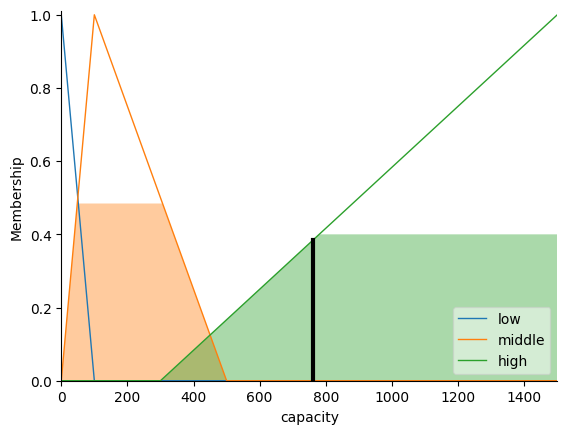

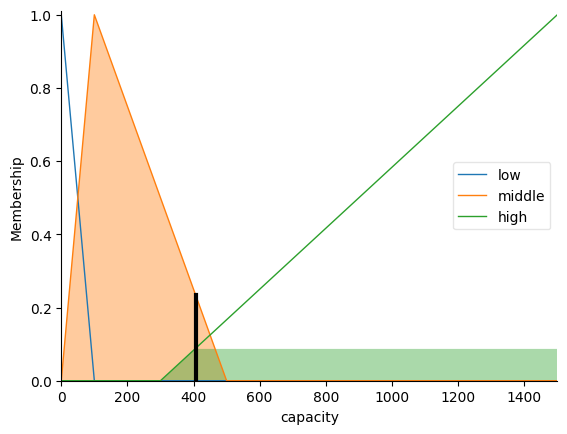

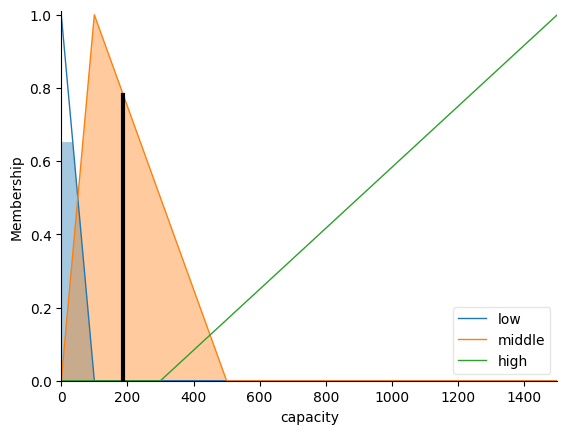

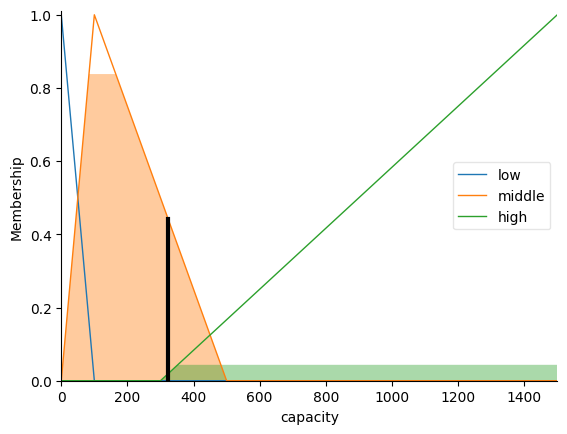

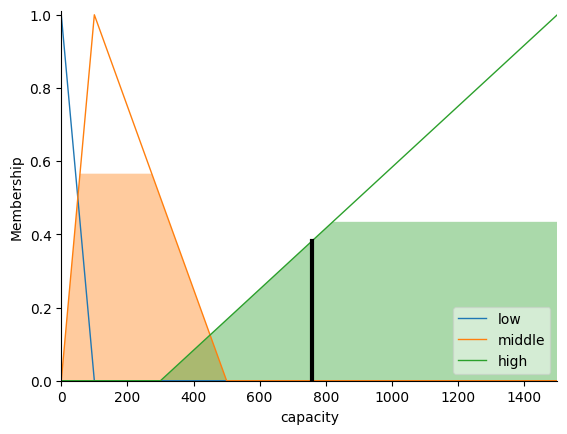

In [22]:
for i in range(5):
    temp = random.randint(-15, 31)
    size = random.randint(1, 36000)
    loss = random.randrange(0, 10, 1)/10
    tipping.input['air_temp'] = temp
    tipping.input['build_size'] = size
    tipping.input['heat_loss'] = loss
    tipping.compute()
    print(f"Прогон: {i+1}\n"
          f"    Температура воздуха: {temp}\n"
          f"    Объем здания: {size}\n"
          f"    Тепловые потери: {loss}\n"
          f"    Выходное значение мощности отопления: {tipping.output['capacity']} кВт")
    
    capacity.view(sim=tipping)
